In [1]:
### JUPYTER NOTEBOOK / MODULE PATH FIX ###
import sys

if "/share/apps/python/3.8.6/intel/lib/python3.8" in sys.path and sys.path[1] == '':
    sys.path[1], sys.path[6] = sys.path[6], sys.path[1]

In [2]:
from jtb_2022_code import FigureSingleCellData

In [3]:
## LOAD ###
data = FigureSingleCellData()
data.do_projections()

Reading Single Cell Data from /scratch/cj59/RAPA/2021_RAPA_TIMECOURSE_FIGS.h5ad
Reading Single Cell Experiment Data from /scratch/cj59/RAPA/2021_RAPA_TIMECOURSE_FIGS_1_WT.h5ad
Reading Single Cell Experiment Data from /scratch/cj59/RAPA/2021_RAPA_TIMECOURSE_FIGS_1_fpr1.h5ad
Reading Single Cell Experiment Data from /scratch/cj59/RAPA/2021_RAPA_TIMECOURSE_FIGS_2_WT.h5ad
Reading Single Cell Experiment Data from /scratch/cj59/RAPA/2021_RAPA_TIMECOURSE_FIGS_2_fpr1.h5ad


In [4]:
import itertools
import matplotlib
import matplotlib.pyplot as plt

from jtb_2022_code.utils.figure_common import *
from jtb_2022_code.figure_constants import *
import scanpy as sc

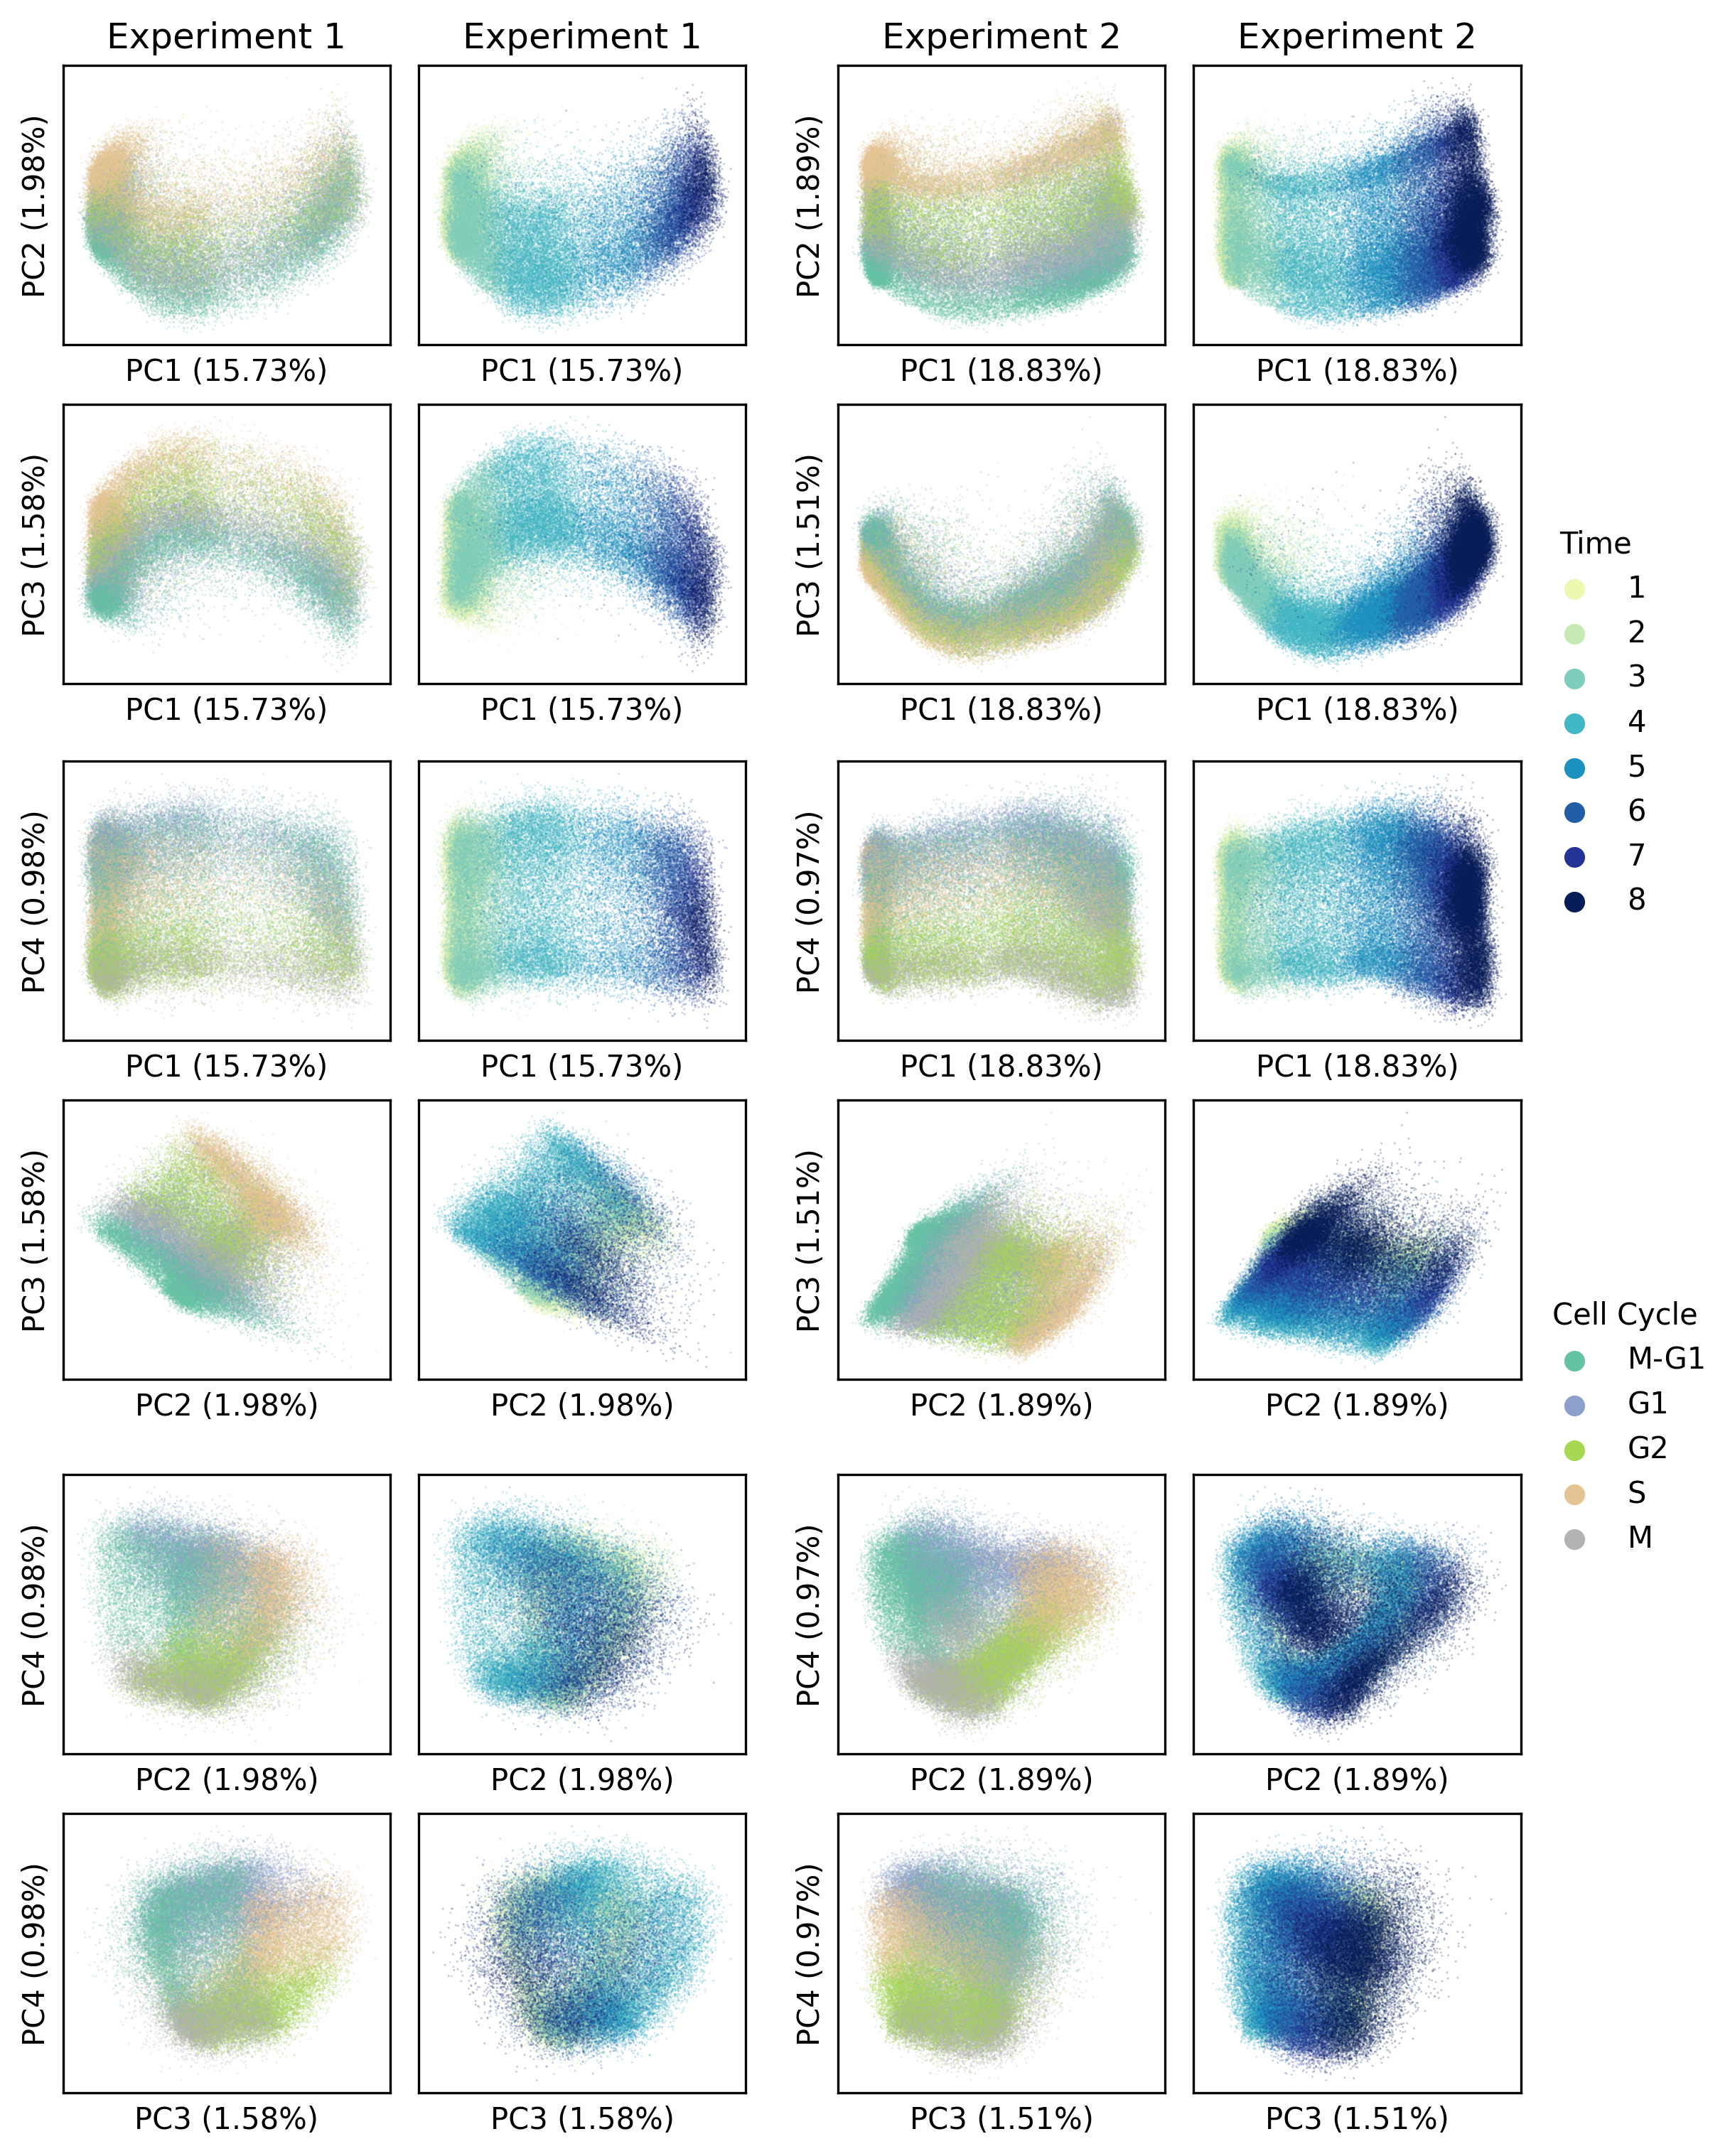

In [6]:
### BUILD PLOT ###
fig_refs = {}
import itertools

layout = [['pc12_1_cc', 'pc12_1_t', '.', 'pc12_2_cc', 'pc12_2_t', '.'],
          ['pc13_1_cc', 'pc13_1_t', '.', 'pc13_2_cc', 'pc13_2_t', 't_cbar'],
          ['pc14_1_cc', 'pc14_1_t', '.', 'pc14_2_cc', 'pc14_2_t', 't_cbar'],
          ['pc23_1_cc', 'pc23_1_t', '.', 'pc23_2_cc', 'pc23_2_t', 'cc_cbar'],
          ['pc24_1_cc', 'pc24_1_t', '.', 'pc24_2_cc', 'pc24_2_t', 'cc_cbar'],
          ['pc34_1_cc', 'pc34_1_t', '.', 'pc34_2_cc', 'pc34_2_t', '.']]

fig, axd = plt.subplot_mosaic(layout,
                              gridspec_kw=dict(width_ratios=[1, 1, 0.1, 1, 1, 0.1], 
                                               height_ratios=[1, 1, 1, 1, 1, 1],
                                               wspace=0, hspace=0.01), 
                              figsize=(8, 10), dpi=300,
                              constrained_layout=True)

for i in range(1,3):
    for j, k in itertools.combinations(range(1,5), 2):
        comp_str = str(j) + ',' + str(k)
        for ak, c, palette in [("_cc", "CC", cc_palette()), ("_t", "Pool", pool_palette())]:
            ax_key = 'pc' + str(j) + str(k) + "_" + str(i) + ak
            fig_refs[ax_key] = sc.pl.pca(data.expt_data[(i, "WT")], ax=axd[ax_key], components=comp_str,
                                         color=c, palette=palette, title=None,
                                         show=False, alpha=0.25, size=2, legend_loc='none',
                                         annotate_var_explained=True)
            axd[ax_key].set_title("")
            if ak == "_t":
                axd[ax_key].set_ylabel("")
        
axd['pc12_1_cc'].set_title("Experiment 1")
axd['pc12_2_cc'].set_title("Experiment 2")
axd['pc12_1_t'].set_title("Experiment 1")
axd['pc12_2_t'].set_title("Experiment 2")

axd['cc_cbar'].axis('off')
fig_refs['cc_cbar'] = add_legend(axd['cc_cbar'], 
                                 cc_palette(), 
                                 CC_COLS,
                                 title="Cell Cycle")

axd['t_cbar'].axis('off')
fig_refs['t_cbar'] = add_legend(axd['t_cbar'], 
                                pool_palette(), 
                                data.all_data.obs['Pool'].dtype.categories.values,
                                title="Time")

fig.savefig(FIGURE_2_1_SUPPLEMENTAL_FILE_NAME + ".png", facecolor='white')
fig.savefig(FIGURE_2_1_SUPPLEMENTAL_FILE_NAME + ".pdf", facecolor='white')